Kaggle competition: https://www.kaggle.com/CooperUnion/cardataset <br>
Хотим предсказать MSRP = car price

План:
- подготовка данных
- используем линейную регрессию для предсказания цены
- заглянем вглубь линейной регресии
- оценим качество модели, используем метрику RMSE
- придумаем свои features
- регуляризация

In [1]:
import pandas as pd
import numpy as np

# Подготовка данных

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head(3).T

,0,1,2
Make,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series
Year,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0
Engine Cylinders,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance"


In [4]:
len(df)

11914

In [5]:
# видим, что в наимнованиях колонок есть пробелы
# хотим сделать названия консистентными, чтобы было удобно обращаться

In [6]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
df.columns.str.replace(' ', '_').str.lower()

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [9]:
type(df.columns)

pandas.core.indexes.base.Index

In [10]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.head(3).T

,0,1,2
make,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series
year,2011,2011,2011
engine_fuel_type,premium unleaded (required),premium unleaded (required),premium unleaded (required)
engine_hp,335.0,300.0,300.0
engine_cylinders,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL
driven_wheels,rear wheel drive,rear wheel drive,rear wheel drive
number_of_doors,2.0,2.0,2.0
market_category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance"


In [12]:
df.engine_hp

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: engine_hp, Length: 11914, dtype: float64

In [13]:
# есть такая проблема с данными, где-то заглавные буквы, где-то нет

In [14]:
df.dtypes # для определения всех колонок с типом строки, нас интересуют объекты

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [15]:
df.dtypes == object

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [16]:
df.dtypes[df.dtypes==object]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [17]:
df.dtypes[df.dtypes==object].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [18]:
list(df.dtypes[df.dtypes==object].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [19]:
string_columns = list(df.dtypes[df.dtypes==object].index)

In [20]:
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [21]:
df.head() # данные теперь имеют более однородные вид

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Анализ данных (как выглядят данные?)

In [22]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [23]:
for col in df.columns: # для каждого столбца выведем некоторую статистику
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [24]:
df.make.unique()

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

In [25]:
df.make.nunique()

48

In [26]:
for col in df.columns: # для каждого столбца выведем некоторую статистику
    print(col)
    print(df[col].unique()[:5]) 
    print(df[col].nunique()) # количество уникальный значений
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [27]:
df.msrp

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 11914, dtype: int64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns # нужно будет установить pip install seaborn

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

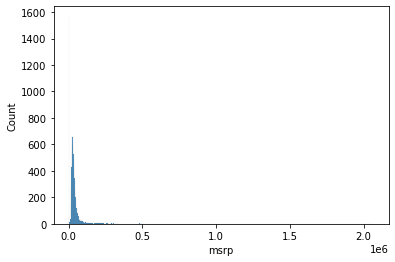

In [29]:
sns.histplot(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

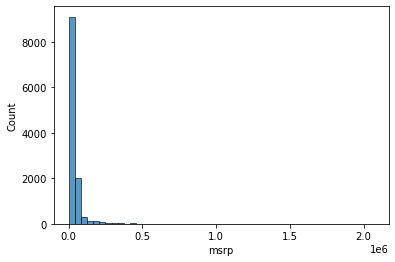

In [30]:
sns.histplot(df.msrp, bins = 50) #bins-количество столбиков гистограммы
# 1e6 = 1.000.000
# такое распределение называется long tail distribution (распределение с длинным хвостом)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

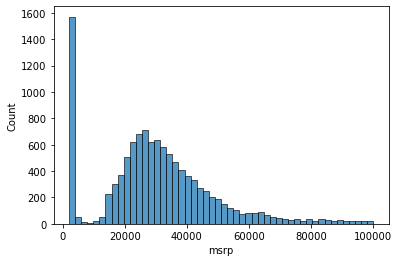

In [31]:
sns.histplot(df[df.msrp<100000].msrp, bins = 50)

In [32]:
df[df.msrp<100000].msrp.mean()

30476.444395175593

<AxesSubplot:xlabel='msrp', ylabel='Count'>

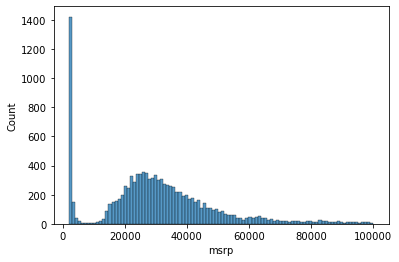

In [33]:
sns.histplot(df[df.msrp<100000].msrp, bins = 100)

In [34]:
# распределение с длинным хвостом часто мешает предсказательной модели

In [35]:
np.log([1, 10, 100, 1000]) # часто применяют логарифмическое преобразование

array([0.        , 2.30258509, 4.60517019, 6.90775528])

In [36]:
np.log([0, 1, 10, 100, 1000])  # возникает проблема с нулём

<ipython-input-36-8bc303c9c586>:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 100, 1000])  # возникает проблема с нулём


array([      -inf, 0.        , 2.30258509, 4.60517019, 6.90775528])

In [37]:
np.log([0 + 1, 1 + 1, 10 + 1, 100 + 1, 1000 + 1]) # решается добавлением 1

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [38]:
np.log1p([0,1,10,100,1000]) # log(x+1) numpy.log1p добавляет + 1

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [39]:
price_logs = np.log1p(df.msrp)

In [40]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

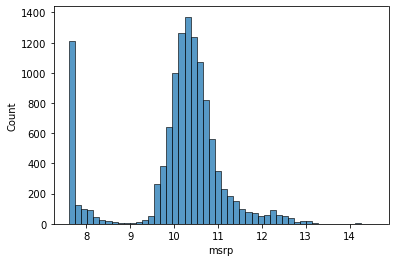

In [41]:
sns.histplot(price_logs,bins=50)#хвост исчез
# расределение стало в большей степени быть похожим на нормальное
# не смотря на выброс около 0
# для таких распределений модели обычно работают лучше

In [42]:
#np.expm1

### Недостающие значения

In [43]:
df.isnull().sum() # видим сколько пустых ячеек в столбцах

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [44]:
df.engine_fuel_type.fillna()

ValueError: Must specify a fill 'value' or 'method'.

# Валидация моделей
- разбиваем данный на три части: для обучения модели, для валидации, для тестирования
- X_train, y_train, X_val, y_val, X_test, y_test
- 60%, 20%, 20% - соотношениею между train:val:test

In [45]:
len(df)

11914

In [46]:
len(df) * 0.2

2382.8

In [47]:
int(len(df) * 0.2)

2382

In [48]:
n = len(df)
n_train = int(len(df) * 0.6)
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)

In [49]:
n_train + n_val + n_test == n

False

In [50]:
n_train + n_val + n_test, n

(11912, 11914)

In [51]:
n = len(df)
n_train = int(len(df) * 0.6)
n_val = int(len(df) * 0.2)
n_test = n - n_val - n_train

In [52]:
n_train + n_val + n_test == n

True

In [53]:
df.iloc[1] # можно получить строку

make                                         bmw
model                                   1_series
year                                        2011
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  300.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category               luxury,performance
vehicle_size                             compact
vehicle_style                        convertible
highway_mpg                                   28
city_mpg                                      19
popularity                                  3916
msrp                                       40650
Name: 1, dtype: object

In [54]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [55]:
df.iloc[[0,1,2]] # можно получить несколько строк

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [56]:
df.iloc[:10] # первые 10 записей

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [57]:
df.iloc[10:20]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,44400
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,37200
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,48250
16,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,43550
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000


In [58]:
df.iloc[len(df)-10:] # последние 10

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11904,bmw,z8,2002,premium_unleaded_(required),394.0,8.0,manual,rear_wheel_drive,2.0,"exotic,luxury,high-performance",compact,convertible,19,12,3916,130000
11905,bmw,z8,2003,premium_unleaded_(required),394.0,8.0,manual,rear_wheel_drive,2.0,"exotic,luxury,high-performance",compact,convertible,19,12,3916,131500
11906,acura,zdx,2011,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46020
11907,acura,zdx,2011,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56570
11908,acura,zdx,2011,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50520
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995


In [59]:
df_val = df.iloc[:n_val]

In [60]:
len(df_val)

2382

In [61]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


In [62]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val: n_val+n_test]
df_train = df.iloc[n_val+n_test:] # данные сгруппированы и нам нужно их перемешать

In [63]:
len(df_val), len(df_test), len(df_train)

(2382, 2384, 7148)

In [64]:
n_val, n_test, n_train

(2382, 2384, 7148)

In [65]:
df.index

RangeIndex(start=0, stop=11914, step=1)

In [66]:
idx = np.arange(n) # хотим их перемешать

In [67]:
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [68]:
np.random.seed(2) # чтобы результаты были воспроизводимы
np.random.shuffle(idx)

In [69]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [70]:
len(df.iloc[idx[:n_val]])

2382

In [71]:
df.iloc[idx[:n_val]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,infiniti,q50,2015,premium_unleaded_(recommended),328.0,6.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",midsize,sedan,27,19,190,45450
9509,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,2.0,flex_fuel,large,regular_cab_pickup,22,17,1385,32095
4682,ford,fiesta,2016,regular_unleaded,197.0,4.0,manual,front_wheel_drive,4.0,"hatchback,factory_tuner,performance",compact,4dr_hatchback,32,26,5657,21460
3701,mercedes-benz,e-class,2016,premium_unleaded_(required),302.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,sedan,28,20,617,55600


In [72]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [73]:
df_train.iloc[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [74]:
len(df_train), len(df_val), len(df_test)

(7148, 2382, 2384)

In [75]:
df_train # видим оригинальные индексы

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995
3602,cadillac,dts,2010,premium_unleaded_(recommended),275.0,8.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,23,15,1624,46280
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215


In [76]:
df_train.reset_index(drop=True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995
7144,cadillac,dts,2010,premium_unleaded_(recommended),275.0,8.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,23,15,1624,46280
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215


In [77]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [78]:
np.log1p(df_train.msrp)

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7143    10.274913
7144    10.742487
7145    10.913287
7146    10.282472
7147    10.453803
Name: msrp, Length: 7148, dtype: float64

In [79]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [80]:
del df_train['msrp'] # чтобы случайно не использовать цену для пресказания цены
del df_val['msrp']
del df_test['msrp']

In [81]:
df_train.head(1).T

,0
make,chevrolet
model,cobalt
year,2008
engine_fuel_type,regular_unleaded
engine_hp,148.0
engine_cylinders,4.0
transmission_type,manual
driven_wheels,front_wheel_drive
number_of_doors,2.0
market_category,NaN


# Линейная регрессия

In [82]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [83]:
y_train[10]

13.08107460729463

In [84]:
np.expm1(y_train[10])

479775.00000000006

In [85]:
xi = [453, 11, 86] # вектор фичей

In [86]:
y_train.mean()

10.10243668554464

In [87]:
def g(xi):
    #делаем что-то
    return np.expm1(y_train.mean())

In [88]:
g(xi) # предсказание цены

24401.39800985507

In [89]:
w0 = 7.17
w = [0.01, 0.04, 0.0002]

In [90]:
def linear_regression(xi):
    pred = w0
    for j in range(len(w)):
        pred += w[j] * xi[j]
    return pred

In [91]:
linear_regression(xi) # получили некоторое предсказание

12.1572

In [92]:
np.expm1(y_train[10])

479775.00000000006

In [93]:
np.expm1(linear_regression(xi))

190459.4803887146

In [94]:
df.popularity.max()

5657

# Векторня форма

In [95]:
def dot(xi, w):
    res = 0.0
    for j in range(len(xi)):
        res += xi[j]*w[j]
    return res

In [96]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [97]:
linear_regression(xi)

12.1572

In [98]:
w_new = [w0] + w

In [99]:
w_new

[7.17, 0.01, 0.04, 0.0002]

In [100]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [101]:
linear_regression(xi)

12.1572

In [102]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)

In [103]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [104]:
w_new

[7.17, 0.01, 0.04, 0.0002]

In [105]:
X.dot(w_new) # получаем предсказаия цены

array([ 9.887 ,  9.8962, 12.1572])

In [106]:
def linear_regression(X):
    return X.dot(w_new)

In [107]:
linear_regression(X)

array([ 9.887 ,  9.8962, 12.1572])

# Обучение модели линейной регрессии

In [108]:
 df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [109]:
# 1. взять численные столцы
df[list(df.dtypes[df.dtypes != object].index)]

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500
...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120
11910,2012,300.0,6.0,4.0,23,16,204,56670
11911,2012,300.0,6.0,4.0,23,16,204,50620
11912,2013,300.0,6.0,4.0,23,16,204,50920


In [110]:
df[list(df.dtypes[df.dtypes != object].index)].isnull().sum()

year                 0
engine_hp           69
engine_cylinders    30
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [111]:
df_train[list(df_train.dtypes[df_train.dtypes != object].index)]

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,2008,148.0,4.0,2.0,33,24,1385
1,2012,132.0,4.0,4.0,32,25,2031
2,2016,148.0,4.0,4.0,37,28,640
3,1991,90.0,4.0,3.0,18,16,873
4,2017,385.0,8.0,4.0,21,15,5657
...,...,...,...,...,...,...,...
7143,2006,221.0,6.0,4.0,26,17,61
7144,2010,275.0,8.0,4.0,23,15,1624
7145,2015,300.0,6.0,2.0,31,20,3916
7146,2015,210.0,4.0,2.0,30,24,873


In [112]:
df_train[list(df_train.dtypes[df_train.dtypes != object].index)].isnull().sum()

year                 0
engine_hp           40
engine_cylinders    14
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [113]:
df_train.engine_hp.mean()

249.0440348902645

In [114]:
df_train.engine_cylinders.mean()

5.627698345948977

<AxesSubplot:xlabel='engine_cylinders', ylabel='Count'>

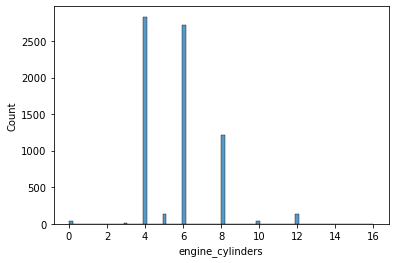

In [115]:
sns.histplot(df_train.engine_cylinders)

In [116]:
df_train.engine_cylinders.mean()

5.627698345948977

In [117]:
df_train.number_of_doors.mean()

3.4315317838140578

In [118]:
df_train.engine_hp = df_train.engine_hp.fillna(250)
df_train.number_of_doors = df_train.number_of_doors.fillna(4)
df_train.engine_cylinders = df_train.engine_cylinders.fillna(6)

In [119]:
numeric_columns = list(df_train.dtypes[df_train.dtypes != object].index)

In [120]:
df_train[list(df_train.dtypes[df_train.dtypes != object].index)].isnull().sum()

year                0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [121]:
X_train = df_train[list(df_train.dtypes[df_train.dtypes != object].index)].values

In [122]:
df_train[numeric_columns]

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,2008,148.0,4.0,2.0,33,24,1385
1,2012,132.0,4.0,4.0,32,25,2031
2,2016,148.0,4.0,4.0,37,28,640
3,1991,90.0,4.0,3.0,18,16,873
4,2017,385.0,8.0,4.0,21,15,5657
...,...,...,...,...,...,...,...
7143,2006,221.0,6.0,4.0,26,17,61
7144,2010,275.0,8.0,4.0,23,15,1624
7145,2015,300.0,6.0,2.0,31,20,3916
7146,2015,210.0,4.0,2.0,30,24,873


In [123]:
X_train

array([[2008.,  148.,    4., ...,   33.,   24., 1385.],
       [2012.,  132.,    4., ...,   32.,   25., 2031.],
       [2016.,  148.,    4., ...,   37.,   28.,  640.],
       ...,
       [2015.,  300.,    6., ...,   31.,   20., 3916.],
       [2015.,  210.,    4., ...,   30.,   24.,  873.],
       [2015.,  285.,    6., ...,   22.,   17.,  549.]])

In [124]:
X_train.shape

(7148, 7)

In [125]:
ones = np.ones((X_train.shape[0],1))

In [126]:
ones.shape

(7148, 1)

In [127]:
np.append(ones, X_train, axis = 1)

array([[1.000e+00, 2.008e+03, 1.480e+02, ..., 3.300e+01, 2.400e+01,
        1.385e+03],
       [1.000e+00, 2.012e+03, 1.320e+02, ..., 3.200e+01, 2.500e+01,
        2.031e+03],
       [1.000e+00, 2.016e+03, 1.480e+02, ..., 3.700e+01, 2.800e+01,
        6.400e+02],
       ...,
       [1.000e+00, 2.015e+03, 3.000e+02, ..., 3.100e+01, 2.000e+01,
        3.916e+03],
       [1.000e+00, 2.015e+03, 2.100e+02, ..., 3.000e+01, 2.400e+01,
        8.730e+02],
       [1.000e+00, 2.015e+03, 2.850e+02, ..., 2.200e+01, 1.700e+01,
        5.490e+02]])

In [128]:
def prepare(df,numeric_columns):
    df = df.copy()
    df.engine_hp = df.engine_hp.fillna(250)
    df.number_of_doors = df.number_of_doors.fillna(4)
    df.engine_cylinders = df.engine_cylinders.fillna(6)
    X = df[numeric_columns]
    X = np.append(np.ones((X.shape[0],1)), X, axis = 1)
    return X

In [129]:
def train_linear_regression(X, y):
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    return XTX_inv.dot(X.T).dot(y)

In [130]:
X_train = prepare(df_train, numeric_columns)
X_train.shape

(7148, 8)

In [131]:
w = train_linear_regression(X_train, y_train)

In [132]:
df.msrp.min()

2000

In [133]:
numeric_columns

['year',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [134]:
w

array([-1.80730668e+02,  9.43167033e-02,  3.89803398e-03,  6.25042650e-02,
       -1.72436187e-02, -2.31249181e-03,  5.25853325e-03, -4.89320043e-05])

In [135]:
def predict(X, w):
    return X.dot(w)

In [136]:
X_val = prepare(df_val, numeric_columns)

In [137]:
y_pred = predict(X_val, w)

In [138]:
y_val

array([12.62248099, 10.54061978, 10.19936098, ..., 10.48433352,
       11.88958635, 11.21756062])

In [139]:
y_pred

array([12.11443268, 10.46805473, 10.25246749, ..., 10.43739013,
       11.52422835, 10.8265804 ])

In [140]:
abs(y_pred-y_val).mean()

0.38388034383637293

In [141]:
abs(y_pred - y_val).sum()/len(y_pred)

0.38388034383637293

In [142]:
np.expm1(y_pred)

array([182485.72016376,  35172.72847783,  28351.41501564, ...,
        34110.50957046, 101135.70016901,  50340.26500356])

In [143]:
np.expm1(y_val)

array([303300.,  37820.,  26885., ...,  35750., 145740.,  74425.])

In [144]:
abs(np.expm1(y_pred) - np.expm1(y_val)).mean()

14246.542282498322

In [145]:
np.expm1(y_val).mean()

39591.956339210745

In [146]:
np.expm1(y_val).std()

47788.1447945502

In [147]:
np.expm1(y_pred).mean()

37458.18206676912

In [148]:
np.expm1(y_pred).std()

38310.399451056874

<AxesSubplot:ylabel='Count'>

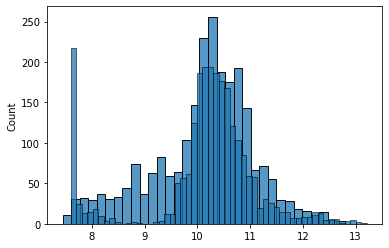

In [149]:
sns.histplot(y_pred)
sns.histplot(y_val)

<AxesSubplot:ylabel='Count'>

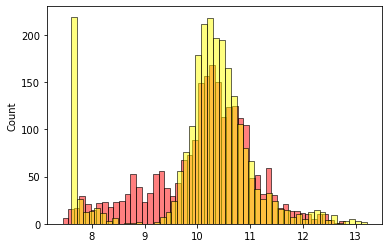

In [150]:
sns.histplot(y_pred, color='red', bins = 50, alpha=0.5)
sns.histplot(y_val, color = 'yellow', bins = 50, alpha = 0.5)

In [151]:
np.expm1(y_pred)[np.expm1(y_pred)<100000]

array([35172.72847783, 28351.41501564, 41982.2371748 , ...,
       55476.41914808, 34110.50957046, 50340.26500356])

In [152]:
np.expm1(y_val)[np.expm1(y_pred)<100000].max()

440000.0000000002

In [153]:
np.expm1(y_val)[np.expm1(y_pred)<100000].min()

2000.0

In [154]:
np.expm1(y_pred).min()

1709.9948449194294

In [155]:
max(np.expm1(y_val)[np.expm1(y_pred)<100000])

440000.0000000002

In [156]:
np.expm1(y_pred)[np.expm1(y_pred)==1709.9948449194294]

array([1709.99484492])

<AxesSubplot:ylabel='Count'>

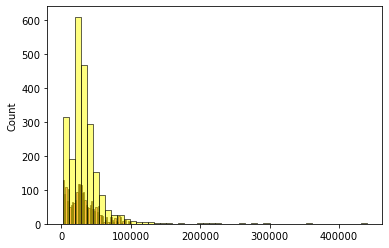

In [157]:
sns.histplot(np.expm1(y_pred)[np.expm1(y_pred)<100000], color='red', bins = 50, alpha=0.5)
sns.histplot(np.expm1(y_val)[np.expm1(y_pred)<100000], color = 'yellow', bins = 50, alpha = 0.5)

<AxesSubplot:ylabel='Count'>

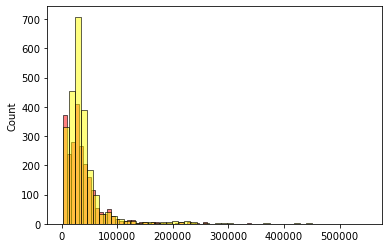

In [158]:
sns.histplot(np.expm1(y_pred), color='red', bins = 50, alpha=0.5)
sns.histplot(np.expm1(y_val), color = 'yellow', bins = 50, alpha = 0.5)

In [159]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error**2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [160]:
rmse(y_val, y_pred)

0.5065619304997133

In [161]:
rmse(np.expm1(y_val), np.expm1(y_pred))

32647.999015118512

In [162]:
rmse(np.array([1,1]), np.array([3,2]))

1.5811388300841898

In [163]:
1.5 = 2.25

SyntaxError: cannot assign to literal (<ipython-input-163-fe2c302e58b8>, line 1)

# Feature engineering

In [164]:
numeric_columns.pop(0)

'year'

In [165]:
numeric_columns = ['age'] + numeric_columns

In [166]:
numeric_columns

['age',
 'engine_hp',
 'engine_cylinders',
 'number_of_doors',
 'highway_mpg',
 'city_mpg',
 'popularity']

In [167]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7143    11
7144     7
7145     2
7146     2
7147     2
Name: year, Length: 7148, dtype: int64

In [168]:
def prepare(df,numeric_columns):
    df = df.copy()
    df['age'] = df_train.year.max() - df_train.year
    df.engine_hp = df.engine_hp.fillna(250)
    df.number_of_doors = df.number_of_doors.fillna(4)
    df.engine_cylinders = df.engine_cylinders.fillna(6)
    X = df[numeric_columns]
    X = np.append(np.ones((X.shape[0],1)), X, axis = 1)
    return X

In [169]:
X_train = prepare(df_train, numeric_columns)

In [170]:
w = train_linear_regression(X_train, y_train)

In [171]:
X_val = prepare(df_val, numeric_columns)

In [172]:
y_pred = predict(X_val, w)

In [173]:
w

array([ 9.50612251e+00, -9.43167033e-02,  3.89803398e-03,  6.25042650e-02,
       -1.72436187e-02, -2.31249181e-03,  5.25853325e-03, -4.89320043e-05])

In [174]:
rmse(y_val, y_pred)

1.1265508476531267

In [175]:
abs(y_pred - y_val).mean()

0.7952772665572152

In [176]:
abs(np.expm1(y_pred) - np.expm1(y_val)).mean()

20331.78367252736

# Regularization

In [177]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5]
]
X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [178]:
XTX = X.T.dot(X)

In [179]:
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [180]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [181]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.00001]
]
X = np.array(X)
y = [1,2,3,1,2,3]
X

array([[4.     , 4.     , 4.     ],
       [3.     , 5.     , 5.     ],
       [5.     , 1.     , 1.     ],
       [5.     , 4.     , 4.     ],
       [7.     , 5.     , 5.     ],
       [4.     , 5.     , 5.00001]])

In [182]:
XTX = X.T.dot(X)

In [183]:
XTX

array([[140.     , 111.     , 111.00004],
       [111.     , 108.     , 108.00005],
       [111.00004, 108.00005, 108.0001 ]])

In [184]:
XTX_inv = np.linalg.inv(XTX)

In [185]:
XTX_inv

array([[ 4.12734158e-02, -6.11735479e+03,  6.11730954e+03],
       [-6.11735479e+03,  1.39206347e+10, -1.39206220e+10],
       [ 6.11730954e+03, -1.39206220e+10,  1.39206093e+10]])

In [186]:
w = XTX_inv.dot(X.T).dot(y)

In [187]:
w

array([ 4.13182969e-01, -1.74517471e+05,  1.74517392e+05])

In [188]:
y

[1, 2, 3, 1, 2, 3]

In [189]:
X.dot(w)

array([1.33470819, 0.8420193 , 1.98640892, 1.74789116, 2.49475118,
       3.00037619])

In [190]:
XTX = [
    [1,2,2],
    [2,1,1],
    [2,1,1]
]

In [191]:
XTX = np.array(XTX)

In [192]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [193]:
XTX = [ # чем больше число добавляем тем ...
    [1 + .001,2,2],
    [2,1 + .001,1],
    [2,1,1 + .001]
]

In [194]:
np.linalg.inv(XTX)

array([[-3.33666889e-01,  3.33500139e-01,  3.33500139e-01],
       [ 3.33500139e-01,  4.99916542e+02, -5.00083458e+02],
       [ 3.33500139e-01, -5.00083458e+02,  4.99916542e+02]])

In [195]:
XTX = [ 
    [1,2,2],
    [2,1,1],
    [2,1,1]
]

In [196]:
XTX  = XTX + 0.01 * np.eye(3)

In [197]:
XTX

array([[1.01, 2.  , 2.  ],
       [2.  , 1.01, 1.  ],
       [2.  , 1.  , 1.01]])

In [198]:
np.linalg.inv(XTX)

array([[ -0.33668906,   0.33501399,   0.33501399],
       [  0.33501399,  49.91540897, -50.08459103],
       [  0.33501399, -50.08459103,  49.91540897]])

In [ ]:
#ДЗ применить регуляризацию и подобрать коэффициент, 
# посмотреть как это отразиться на работе модели
# r = 0.01, 0.1,1,10,100,0.001,0.0001 - например такие

In [ ]:
# regularization works?

In [207]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [208]:
X_train.shape

(7148, 8)

In [218]:
def train_linear_regression(X, y, r=0.):
    XTX = X.T.dot(X) + r*np.eye(X.shape[1])
    XTX_inv = np.linalg.inv(XTX)
    print(XTX_inv.mean())
    return XTX_inv.dot(X.T).dot(y)

In [219]:
for r in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    w = train_linear_regression(X_train, y_train, r)
    y_pred = X_val.dot(w)
    print(r,rmse(y_pred, y_val))

0.00012792119411226248
0.001 1.1265434916705241
0.00012790848646260247
0.01 1.126477300707695
0.00012778155125958105
0.1 1.1258166647128174
0.0001265261716236002
1 1.119335999527985
0.00011522851519200332
10 1.065598269633248
6.144404495728228e-05
100 0.9535006104782751
1.2433976428530647e-05
1000 1.0744856399468126
2.3961573887757107e-06
10000 1.1884296666274405


# EDA
- check missing values
- look at the target variable
- look at numerical and categorical variables

In [ ]:
df_train.isnull()

In [ ]:
df_train.isnull().sum()

In [ ]:
df_train.make.value_counts(normalize=True) #поделить на общее количество

In [ ]:
df_train.dtypes

In [ ]:
df_train.dtypes != object

In [ ]:
numerical = list(df_train.dtypes[(df_train.dtypes != object)].index)
categorical = list(df_train.dtypes[(df_train.dtypes == object)].index)

In [ ]:
numerical

In [ ]:
categorical

In [ ]:
df[categorical]

In [ ]:
df[numerical]

In [ ]:
df_train[categorical].nunique()